# Classification 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import pickle

from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('./Data/tsvFiles/data.tsv', sep = '\t')

df.head()

,Password,Strength
0,ulGCsczQ1NQEc9BH,2
1,esvgrzjp5,1
2,w_6mULWX_&x5,2
3,heron,0
4,T4.9aFg%y,2


In [3]:
def word_divide_char(X):
    return list(X)

In [4]:
vectorizer = TfidfVectorizer(tokenizer = word_divide_char, encoding = 'utf-8')

X = vectorizer.fit_transform(df['Password'].values.astype('U'))

In [5]:
y = df['Strength'].values

##### Split into train and validation set

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
print(X_train.shape, X_val.shape)

(451454, 154) (193481, 154)


In [25]:
print(y_train.shape, y_val.shape)

(451454,) (193481,)


## Model - DT

In [26]:
dt = DecisionTreeClassifier(random_state = 0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [38]:
y_pred_val = dt.predict(X_val)

In [40]:
y_pred_val = y_pred_val.reshape((-1, 1))

In [41]:
y_val.shape, y_pred_val.shape

((193481, 1), (193481, 1))

In [42]:
count = 0

for i in range(y_val.shape[0]):
    if (y_val[i] == y_pred_val[i]):
        count += 1

score = (count / y_val.shape[0]) * 100

print(score)

91.23996671507797


In [43]:
scores = cross_val_score(dt, X, y, cv = 3)

print(scores.mean())

<built-in method mean of numpy.ndarray object at 0x7f51acd2ce90>


In [45]:
scores.mean() * 100

91.12050093227224

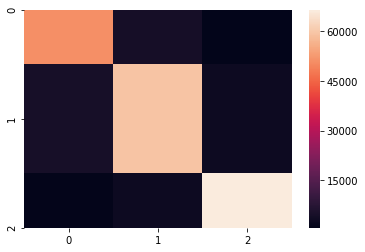

In [50]:
cm_dt = confusion_matrix(y_val, y_pred_val)

ax = plt.subplot()
sns.heatmap(cm_dt, annot = False, ax = ax)
plt.show()

In [48]:
cm_dt

array([[50900,  4534,   740],
       [ 4825, 59419,  2836],
       [ 1003,  3011, 66213]])

____

## Model - RF

In [64]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

/home/boi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
y_pred_val = rf.predict(X_val)

In [71]:
y_pred_val = y_pred_val.reshape((-1, 1))

In [72]:
count = 0

for i in range(y_val.shape[0]):
    if (y_val[i] == y_pred_val[i]):
        count += 1

score = (count / y_val.shape[0]) * 100

print(score)

94.20149782149151


In [73]:
scores = cross_val_score(rf, X, y, cv = 3)

print(scores.mean() * 100)

0.9415708557025323


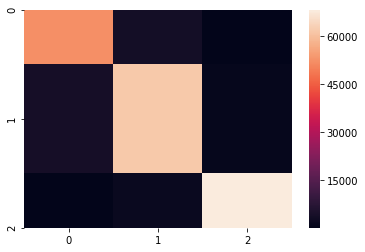

In [74]:
cm_rf = confusion_matrix(y_val, y_pred_val)

ax = plt.subplot()
sns.heatmap(cm_rf, annot = False, ax = ax)
plt.show()

In [75]:
cm_rf

array([[52254,  3754,   166],
       [ 4014, 61846,  1220],
       [  186,  1879, 68162]])

____

## Model - XGBoost

In [7]:
xgb = xgb.XGBClassifier()

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [8]:
y_pred_val = xgb.predict(X_val)
y_pred_val = y_pred_val.reshape((-1, 1))

In [9]:
count = 0

for i in range(y_val.shape[0]):
    if (y_val[i] == y_pred_val[i]):
        count += 1

score = (count / y_val.shape[0]) * 100

print(score)

90.40577627777404


In [11]:
scores = cross_val_score(xgb, X, y, cv = 3)

print(scores.mean() * 100)

90.50617509360525


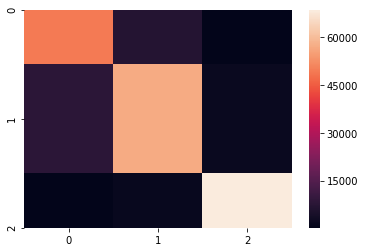

In [12]:
cm_xgb = confusion_matrix(y_val, y_pred_val)

ax = plt.subplot()
sns.heatmap(cm_xgb, annot = False, ax = ax)
plt.show()

In [13]:
cm_xgb

array([[49374,  6569,   231],
       [ 7982, 57104,  1994],
       [  155,  1632, 68440]])

___